# Problem #1

### a.)
Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read in data matrix
df = pd.read_csv('segmentation_data.txt', header=None)
df.head(), df.shape

(      0      1   2    3    4         5         6         7         8   \
 0  110.0  189.0   9  0.0  0.0  1.000000  0.666667  1.222222  1.186342   
 1   86.0  187.0   9  0.0  0.0  1.111111  0.720082  1.444444  0.750309   
 2  225.0  244.0   9  0.0  0.0  3.388889  2.195113  3.000000  1.520234   
 3   47.0  232.0   9  0.0  0.0  1.277778  1.254621  1.000000  0.894427   
 4   97.0  186.0   9  0.0  0.0  1.166667  0.691215  1.166667  1.005540   
 
           9          10         11         12        13         14         15  \
 0  12.925926  10.888889   9.222222  18.666668 -6.111111 -11.111111  17.222221   
 1  13.740741  11.666667  10.333334  19.222221 -6.222222 -10.222222  16.444445   
 2  12.259259  10.333334   9.333334  17.111110 -5.777778  -8.777778  14.555555   
 3  12.703704  11.000000   9.000000  18.111110 -5.111111 -11.111111  16.222221   
 4  15.592592  13.888889  11.777778  21.111110 -5.111111 -11.444445  16.555555   
 
           16        17        18  
 0  18.666668  0.508139 

In [7]:
#read in feature labels
col_labels = pd.read_csv('segmentation_names.txt', header=None)
col_labels.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [9]:
#assign labels to df
df.columns = col_labels[0]
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [12]:
#read in class labels
df_target = pd.read_csv('segmentation_classes.txt', sep='\t', header=None)
df_target.head(), df_target.shape

(       0  1
 0  GRASS  0
 1  GRASS  0
 2  GRASS  0
 3  GRASS  0
 4  GRASS  0,
 (2100, 2))

In [13]:
#min-max scaler on df
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(df)

df_norm = min_max_scaler.transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns, index=df.index)

In [14]:
df_norm.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.430830,0.741667,0.0,0.0,0.0,0.034221,0.000672,0.027329,0.000856,0.090111,0.079417,0.061119,0.130943,0.731343,0.014118,0.872865,0.123711,0.508139,0.831849
1,0.335968,0.733333,0.0,0.0,0.0,0.038023,0.000726,0.032298,0.000541,0.095791,0.085089,0.068483,0.134840,0.729478,0.023529,0.859583,0.127393,0.463329,0.836986
2,0.885375,0.970833,0.0,0.0,0.0,0.115970,0.002213,0.067081,0.001097,0.085463,0.075365,0.061856,0.120031,0.736940,0.038824,0.827324,0.113402,0.480149,0.844782
3,0.181818,0.920833,0.0,0.0,0.0,0.043726,0.001265,0.022360,0.000645,0.088562,0.080227,0.059647,0.127046,0.748134,0.014118,0.855787,0.120029,0.500966,0.825889
4,0.379447,0.729167,0.0,0.0,0.0,0.039924,0.000697,0.026087,0.000725,0.108701,0.101297,0.078056,0.148090,0.748134,0.010588,0.861480,0.139912,0.442661,0.823924


In [18]:
print(df['REGION-PIXEL-COUNT'].unique())

[9]


### b.)
Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visualization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [19]:
from sklearn.cluster import KMeans

In [20]:
#kmeans, fit data and "predict" the cluster assignment
kmeans = KMeans(n_clusters=7, max_iter=500)
kmeans.fit(df_norm)
clusters = kmeans.predict(df_norm)

In [21]:
clusters

array([1, 1, 1, ..., 3, 3, 0], dtype=int32)

In [23]:
#calculate and print centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.256103,0.393468,0.0,0.074510,0.019118,0.077343,0.004100,0.060574,0.004967,0.148187,0.138085,0.185160,0.118539,0.716906,0.344014,0.355458,0.185413,0.411986,0.201890
1,0.513994,0.808937,0.0,0.077441,0.005051,0.054474,0.001407,0.046335,0.001401,0.108790,0.091403,0.092414,0.142676,0.679161,0.079002,0.821287,0.134901,0.414491,0.892333
2,0.535099,0.150167,0.0,0.027778,0.001667,0.030228,0.000543,0.026766,0.000587,0.823246,0.779716,0.894170,0.788761,0.270665,0.666373,0.289386,0.894170,0.211804,0.125066
3,0.770674,0.425215,0.0,0.013978,0.022581,0.040237,0.002989,0.023122,0.002088,0.041138,0.035005,0.058340,0.028766,0.778473,0.223939,0.486509,0.059295,0.538181,0.243969
4,0.302506,0.530862,0.0,0.052260,0.046610,0.100817,0.009420,0.083972,0.011043,0.400608,0.370347,0.472461,0.353036,0.497146,0.570882,0.213054,0.472461,0.302263,0.163879
5,0.254169,0.459974,0.0,0.026256,0.013699,0.037274,0.002364,0.027874,0.002017,0.026013,0.017925,0.042306,0.016504,0.769800,0.216011,0.508117,0.043295,0.801687,0.181153
6,0.750696,0.534564,0.0,0.040000,0.038462,0.114419,0.019301,0.109240,0.017999,0.300955,0.279908,0.352738,0.265920,0.592572,0.451124,0.309158,0.352822,0.302342,0.164764


In [24]:
#measure the quality of clustering, Silhouette values
from sklearn import metrics

In [25]:
silhouettes = metrics.silhouette_samples(df_norm, clusters)
print(silhouettes[:20])

[0.57202831 0.56064636 0.46584172 0.49522097 0.57151852 0.56037254
 0.54213796 0.41254281 0.51968142 0.46733032 0.48661677 0.49108474
 0.58463969 0.56222519 0.37949564 0.53083575 0.54919193 0.42227935
 0.41618572 0.40389039]


In [26]:
#average silhouette score, closer to 1 is better, range -1 to 1
print(silhouettes.mean())

0.332066475286672


In [27]:
#function to plot silhouette data
def plot_silhouettes(data, clusters):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0,0
    cticks = []
    
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0,
               edgecolor='none', color=color)
        
        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    
    plt.yticks(cticks, cluster_labels)
    plt.ylabel("Cluster")
    plt.xlabel("silhouette coefficient")
    
    plt.tight_layout()
    
    plt.show()
    
    return

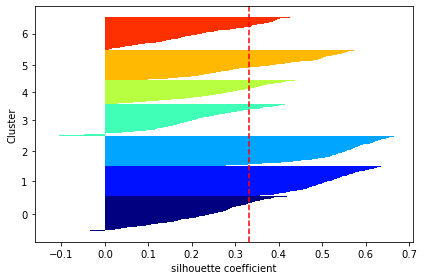

In [28]:
plot_silhouettes(df_norm, clusters)

In [30]:
from sklearn.metrics import completeness_score, homogeneity_score

In [32]:
#calculate homogenity and completeness scores
print(f"Completeness Score: {completeness_score(df_target[1],clusters)}")
print(f"Homogenity Score: {homogeneity_score(df_target[1],clusters)}")

Completeness Score: 0.6131870124853012
Homogenity Score: 0.6115021163370863


## Summary
From our mean silhouette score, we get a value of .332, which isn't a great score to get, as we want to score as close to 1 as possible. We further validate this by plotting the silhouette scores for each observation, and see that there are 2-3 clusters classified decently (cluster 1, 2, 5), while the rest are scoring pretty far below the average and even negative silhouette scores. Then, we calculate the completeness and homogenity scores by comparing the target classification with our predicted clusters. We get completeness & homogenity scores of .613 and .611 respectively, indicating that our separation between clusters and cohesion within clusters isn't great either.

### c.)
Do your own experiments with the number of clusters to see if a different value of K results in more cohesive clustering based on Silhouette analysis. Please do not provide all your clustering results, but you should include the best result according to your analysis and provide a brief discussion of why this particular clustering was selected.

In [43]:
#create function to check best mean silhouette value for given k
def silhouette_calc(data,N):
    '''takes in data and a value for N and checks that number of k and returns max silhouette val w/ k'''
    from sklearn import metrics
    
    res = {}
    
    for i in range(2,N+1):
        kmeans = KMeans(n_clusters=i, max_iter=500) #kmeans for i# of clusters
        kmeans.fit(data) #fit data
        clusters = kmeans.predict(data) #assign clusters
        silhouettes = metrics.silhouette_samples(data, clusters) #calc silhouette scores
        res[i] = silhouettes.mean() #stores silhouette score
    print(res)
    return max(res, key=res.get), max(res.values())

In [44]:
res = silhouette_calc(df_norm, 10)
res

{2: 0.46317096004832026, 3: 0.3214713024869174, 4: 0.38160981543092376, 5: 0.3480747805114875, 6: 0.33372943972323865, 7: 0.3320776409159453, 8: 0.34085260400997613, 9: 0.3080195268450422, 10: 0.3057765208844841}


(2, 0.46317096004832026)

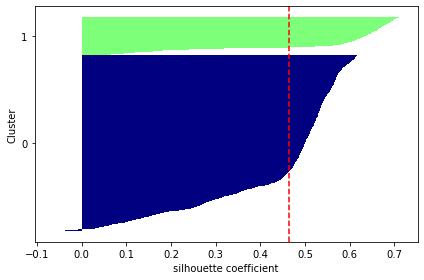

In [45]:
#plot silhouettes for max
kmeans = KMeans(n_clusters=res[0], max_iter=500)
kmeans.fit(df_norm)
clusters = kmeans.predict(df_norm)
plot_silhouettes(df_norm, clusters)

## Summary
After applying our function to test for the best silhouette score between 2 and 10 clusters, we get a value of 2 with a silhouette score of .463. Although we're only using 2 clusters, the silhouette score is higher, indicating that we do a better job at classifying the observations within the same class as well as separating the two classes from one another. Since we are supposed to have 7 classes, I'm guessing that there are some outliers/noise that is causing the k-means method to incorrectly classify these points. If the clusters aren't spherically shaped, k-means typically has trouble, so performing some dimensionality reduction in the next couple steps might prove to be useful.

### d.)
Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [46]:
from sklearn import decomposition

In [78]:
#create pca, fit to df_norm
pca = decomposition.PCA()
df_trans = pca.fit_transform(df_norm)

In [79]:
print(df_trans)

[[-0.69  0.53  0.25 ... -0.    0.    0.  ]
 [-0.67  0.51  0.34 ...  0.   -0.   -0.  ]
 [-0.71  0.77 -0.16 ...  0.    0.    0.  ]
 ...
 [-0.51 -0.13 -0.08 ... -0.    0.    0.  ]
 [-0.48 -0.09 -0.16 ... -0.    0.   -0.  ]
 [-0.44 -0.11 -0.05 ... -0.    0.    0.  ]]


In [80]:
#explained var by component
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


Text(0, 0.5, 'Percentage of Variance')

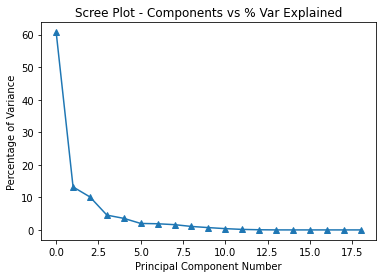

In [81]:
#scree plot
varPercentage = pca.explained_variance_ratio_*100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(19), varPercentage[:], marker='^')
plt.title('Scree Plot - Components vs % Var Explained')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')

In [82]:
#calc how many components to get >=.95 var explained
s = 0
for i in range(len(pca.explained_variance_ratio_)):
    s += pca.explained_variance_ratio_[i]
    print(i+1,s)

1 0.607142339685333
2 0.7391121320168929
3 0.840349861425619
4 0.8857852534332584
5 0.9212588648109569
6 0.9411392197960623
7 0.9600589227704958
8 0.9762130108194517
9 0.9868690193362032
10 0.9939823945149533
11 0.9979044297671411
12 0.9994794328616068
13 0.9999685835864895
14 0.9999999999999993
15 0.9999999999999996
16 0.9999999999999997
17 0.9999999999999998
18 0.9999999999999999
19 0.9999999999999999


In [98]:
#7 components needed for >=.95 var explained, transform df to reduced 7 features
dftrans_reduced = df_trans[:,:7]
dftrans_reduced

array([[-0.69,  0.53,  0.25, ..., -0.08,  0.05, -0.05],
       [-0.67,  0.51,  0.34, ..., -0.04,  0.06, -0.04],
       [-0.71,  0.77, -0.16, ..., -0.17,  0.04, -0.06],
       ...,
       [-0.51, -0.13, -0.08, ..., -0.03, -0.03, -0.11],
       [-0.48, -0.09, -0.16, ...,  0.  , -0.  , -0.09],
       [-0.44, -0.11, -0.05, ...,  0.02, -0.21,  0.15]])

### e.)
Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.

In [99]:
#Kmeans, lower dim data
kmeans2 = KMeans(n_clusters=7, max_iter=500)
kmeans2.fit(dftrans_reduced)
clusters2 = kmeans2.predict(dftrans_reduced)

In [100]:
#silhouette mean
silhouettes = metrics.silhouette_samples(dftrans_reduced, clusters2)
silhouettes.mean()

0.35970957979807067

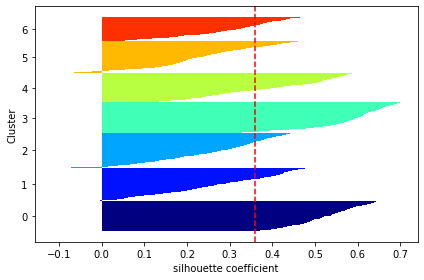

In [101]:
#plot
plot_silhouettes(dftrans_reduced, clusters2)

In [102]:
#compute homogenity and completeness scores
print(f"Completeness Score: {completeness_score(df_target[1],clusters2)}")
print(f"Homogenity Score: {homogeneity_score(df_target[1],clusters2)}")

Completeness Score: 0.6115749269916771
Homogenity Score: 0.6099736092174177


## Summary
Comparing our scores from part b.), we get .3597 vs .3320 for our silhouette mean scores, .6116 vs .6132 for completeness scores, and .6100 vs .6115 for our homogenity score. So overall, our silhouette mean did improve slightly in the reduced dimension dataset, but our overall completeness and homogenity scores remain the same. Reducing the dimensions on our dataset helped elimnate some of the noise, which resulted in a better silhouette mean score.

# Problem #2


### a.)
Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Note the differences. Use the standard item-based collaborative filtering (based on the rating prediction function "standEst"). Next, find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version (using "svdEst" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.

In [103]:
import itemBasedRec as ibr

In [118]:
#load in data
jokes_df = pd.read_csv('modified_jester_data.csv', header=None)
jokes_mat = np.mat(jokes_df)
jokes_df.head(), jokes_df.shape

(      0      1      2      3      4      5      6      7      8      9   ...  \
 0   3.18  19.79   1.34   2.84   3.48   2.50   1.15  15.17   2.02   6.24  ...   
 1  15.08  10.71  17.36  15.37   8.62   1.34  10.27   5.66  19.88  20.22  ...   
 2   0.00   0.00   0.00   0.00  20.03  20.27  20.03  20.27   0.00   0.00  ...   
 3   0.00  19.35   0.00   0.00  12.80  19.16   8.18  17.21   0.00  12.84  ...   
 4  19.50  15.61   6.83   5.61  12.36  12.60  18.04  15.61  10.56  16.73  ...   
 
       90     91     92     93     94     95     96     97     98     99  
 0  13.82   0.00   0.00   0.00   0.00   0.00   5.37   0.00   0.00   0.00  
 1  13.82   6.05  10.71  18.86  10.81   8.86  14.06  11.34   6.68  12.07  
 2   0.00   0.00   0.00  20.08   0.00   0.00   0.00   0.00   0.00   0.00  
 3   0.00   0.00   0.00  11.53   0.00   0.00   0.00   0.00   0.00   0.00  
 4  16.19  16.58  15.27  16.19  16.73  12.55  14.11  17.55  12.80  12.60  
 
 [5 rows x 100 columns],
 (1000, 100))

In [119]:
#load in joke ids
joke_ids = pd.read_csv('jokes.csv',header=None)
joke_ids = pd.DataFrame(joke_ids[1])
joke_ids.head(), joke_ids.shape

(                                                   1
 0  A man visits the doctor. The doctor says "I ha...
 1  This couple had an excellent relationship goin...
 2  Q. What's 200 feet long and has 4 teeth? A. Th...
 3  Q. What's the difference between a man and a t...
 4  Q. What's O. J. Simpson's Internet address? A....,
 (100, 1))

In [130]:
a = ibr.recommend(jokes_mat, 4, 5, ibr.pearsonSim, ibr.standEst)
a

[(71, 14.413443009309447),
 (75, 14.397311198445264),
 (79, 14.382511887413443),
 (78, 14.356160763938075),
 (72, 14.334361485417928)]

In [155]:
#create function
def rec_jokes(M, user, N=3, simMeas=ibr.pearsonSim, estMethod=ibr.standEst):
    '''outputs format with joke description using recommend function'''
    a = ibr.recommend(M, user, N, simMeas, estMethod)
    
    #fix formatting
    a = pd.DataFrame(a)
    a.index = a[0]
    a = pd.DataFrame(a[1])
    a['Joke Description'] = joke_ids.iloc[a.index]
    a.columns = [['Predicted Rating', 'Joke Description']]
    return a
    

In [156]:
#user id 4, top 5 jokes, pearson sim, standard est
a = rec_jokes(jokes_mat, 4, 5, ibr.pearsonSim, ibr.standEst)
a

,Predicted Rating,Joke Description
0,,
71,14.41,On the first day of college the Dean addressed...
75,14.40,There once was a man and a woman that both go...
79,14.38,Hillary Bill Clinton and the Pope are sitting ...
78,14.36,Q: Ever wonder why the IRS calls it Form 1040?...
72,14.33,Q: What is the difference between George Wash...


In [157]:
#user id 4, top 5 jokes, cosine sim, standard est
a = rec_jokes(jokes_mat, 4, 5, ibr.cosineSim, ibr.standEst)
a

,Predicted Rating,Joke Description
0,,
71,14.29,On the first day of college the Dean addressed...
75,14.29,There once was a man and a woman that both go...
79,14.29,Hillary Bill Clinton and the Pope are sitting ...
78,14.29,Q: Ever wonder why the IRS calls it Form 1040?...
70,14.29,At a recent Sacramento PC Users Group meeting ...


In [135]:
a.index

Int64Index([71, 75, 79, 78, 72], dtype='int64', name=0)

In [158]:
#user id 25, top 5 jokes, pearson sim, standard est
a = rec_jokes(jokes_mat, 25, 5, ibr.pearsonSim, ibr.standEst)
a

,Predicted Rating,Joke Description
0,,
99,15.32,Q: What's the difference between greeting a Qu...
71,15.32,On the first day of college the Dean addressed...
97,15.32,Age and Womanhood1. Between the ages of 13 and...
82,15.30,"What a woman says:""This place is a mess! C'mo..."
91,15.29,Early one morning a mother went to her sleepin...


In [162]:
#user id 25, top 5 jokes, pearson sim, svd est
a = rec_jokes(jokes_mat, 25, 5, ibr.pearsonSim, ibr.svdEst)
a

,Predicted Rating,Joke Description
0,,
3,15.28,Q. What's the difference between a man and a t...
79,15.24,Hillary Bill Clinton and the Pope are sitting ...
72,15.21,Q: What is the difference between George Wash...
71,15.19,On the first day of college the Dean addressed...
99,15.18,Q: What's the difference between greeting a Qu...


In [169]:
np.array(a[['Joke Description']])

array([["Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it."],
       ['Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."'],
       ["Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference."],
       ['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He contin

## Summary

Looking at user id 4, we see that both the pearson and cosine similarities classify the first 4 jokes the same, but they differ on the last joke (joke 72 vs joke 70). Looking at the predicted rating, we see that the values for the cosine similarity are very close to each other, while pearson is spread further apart. The jokes themselves seem related to government in both categories.

Looking at user id 25, we see pretty different results comparing the standEst and svdEst item-based collaborative filters. The standEst values seem to have jokes relating to women, while svdEst seems to have a mix of both government related jokes and women related jokes. The ratings are more tightly knit for the standEst compared to the svdEst.

### b.)
Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure. Note that this may take several minutes depending on your computational environment. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [170]:
b = ibr.cross_validate_user(jokes_mat, 4, .2)
b

(71.11723843611041, 18)

In [237]:
def test(dataMat, test_ratio, estMethod, simMeas=ibr.pearsonSim):
    '''for each user, perform MAE cross validation w/ 20% test ratio and store it in a df to calc ttl MAE'''
    #create df of correct shape of ones
    res = pd.DataFrame(np.ones((np.shape(dataMat)[0],2), dtype=float),columns=['Error','Count'])
    
    for i in range(dataMat.shape[0]):
        
        #perform cv
        cv = ibr.cross_validate_user(dataMat, i, test_ratio, estMethod, simMeas)
        #store cv values into df
        res.iloc[i] = res.iloc[i] * cv
    
    return res['Error'].sum() / res['Count'].sum()
            

In [238]:
#20% test using standard estimator
a = test(jokes_mat, .2, ibr.standEst)
a

3.7124208021257803

In [239]:
#20% test using svd estimator
b = test(jokes_mat, .2, ibr.svdEst)
b

3.6469942826788713

## Summary
After creating the test function and utilizing it to calculate a total MAE across all users for our standard and svd estimator, we see that our standard estimator was slightly worse due to having a higher MAE value. This could be because the SVD reduces the dimensionality of our matrix (hard coded to 4), which may reduce the noise going on in the total number of dimensions. The MAE tells us that using 20% of our data as test data, we were on average off on our user predicted ratings by 3.71 and 3.65 in the standard and svd estimator respectively.

### c.)
Write a new function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke. You function should take as input the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:

     * Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.
     * Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

In [241]:
jokes_mat_T = jokes_mat.T
jokes_mat_T

matrix([[ 3.18, 15.08,  0.  , ..., 16.58,  3.67,  9.88],
        [19.79, 10.71,  0.  , ..., 16.63,  4.45, 11.73],
        [ 1.34, 17.36,  0.  , ..., 15.85,  3.67,  9.16],
        ...,
        [ 0.  , 11.34,  0.  , ...,  0.  ,  3.77,  0.  ],
        [ 0.  ,  6.68,  0.  , ...,  0.  ,  3.77,  0.  ],
        [ 0.  , 12.07,  0.  , ...,  0.  ,  3.28,  0.  ]])

In [268]:
def calc_joke_sim(dataMat, joke_id, simMeas):
    '''calculates the similarity of a given joke_id to all other jokes'''
    
    res = pd.DataFrame(np.ones((np.shape(dataMat)[1],1), dtype=float),columns=['Sim'])
    
    for i in range(dataMat.shape[1]):
        
        sim = simMeas(dataMat[:,i], dataMat[:,joke_id])
        
        res.iloc[i] = res.iloc[i] * sim
    return res

In [313]:
def print_most_similar_jokes(dataMat, joke_id, k, simMeas):
    '''finds the top k most similar jokes to a given joke using a similarity measure'''
    
    #calculate joke_id similarity between all jokes
    res = calc_joke_sim(dataMat, joke_id, simMeas)
    #add joke description to res
    res['Joke Description'] = joke_ids.iloc[res.index]
    #sort results
    res.sort_values(by=['Sim'], inplace=True, ascending=False)
    
    ares = np.array(res)
    
    #selected joke
    print('Selected Joke:')
    print(f"Joke ID: {joke_id}\nJoke: {ares[0,1]}")
    print()
    print(f"Top {k} Recommended jokes are: ")
    #print k most similar jokes for given joke
    for i in range(k):
        print(f"Joke {i+1} Similarity Value: {ares[i+1,0]}")
        print(f"Joke {i+1} Description: {ares[i+1,1]}")
        print("----------------------------------------------------------------------------------------------------")
        
    

In [316]:
#top 3 jokes for joke_id 9 using pearsonSim
res = print_most_similar_jokes(jokes_mat, 9, 3, ibr.pearsonSim)
res

Selected Joke:
Joke ID: 9
Joke: Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 Recommended jokes are: 
Joke 1 Similarity Value: 0.7613547766060571
Joke 1 Description: A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"
----------------------------------------------------------------------------------------------------
Joke 2 Similarity Value: 0.7584095690232999
Joke 2 Description: Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer...
----------------------------------------------------------------------------------------------------
Joke 3 Similarity Value: 0.7540592776837659
Joke 3 Description: A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name

In [317]:
#top 3 jokes for joke_id 9 using cosineSim
res2 = print_most_similar_jokes(jokes_mat, 9, 3, ibr.cosineSim)
res2

Selected Joke:
Joke ID: 9
Joke: Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 Recommended jokes are: 
Joke 1 Similarity Value: 0.9290069063401065
Joke 1 Description: Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer...
----------------------------------------------------------------------------------------------------
Joke 2 Similarity Value: 0.9283595009905077
Joke 2 Description: May I take your order? the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."
----------------------------------------------------------------------------------------------------
Joke 3 Similarity Value: 0.9268826687157665
Joke 3 Description: A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do 

## Summary
After creating our joke similarity function, I calculated the Top 3 recommended jokes for joke_id 9 utilizing pearson and cosine similarity. For pearson, we see that the similarity values are significantly lower than those for cosine. They both selected two of the same jokes (in different order) and one joke different.

### d.)
The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the k most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a (using both Pearson and cosine similarities).

In [403]:
#compute training function
def r_train(dataMat, simMeas):
    '''returns the pairwise similarity matrix for a given data matrix'''
    n = dataMat.shape[1]
    res = pd.DataFrame(np.ones((n, n), dtype=float), columns=range(n))
    #return res
    
    for i in range(n):
        
        #calculate ith joke similarity vector
        sim = calc_joke_sim(dataMat, i, simMeas)
        
        #update ith joke in result
        res[i] = res[i] * sim['Sim']
    
    return np.mat(res)
        

In [460]:
#test/prediction function
def r_test(dataMat, target_user, item, k, simMat):
    '''Returns the predicted rating on the target item for the target user'''
    #get k sims from simMat
    simMat = pd.DataFrame(simMat)
    topJokes = simMat.sort_values(by=[item], ascending=False)
    simWeights = np.array(topJokes)[1:k+1,0]
    #return simWeights
    
    #get k ratings from dataMat
    r = pd.DataFrame(jokes_mat[target_user])
    r = r.T
    ratings = r.iloc[topJokes[1:k+1].index]
    weightedAvg = (simWeights * ratings.T).T.sum() / k
    
    return weightedAvg

In [462]:
#train your data matrix, pearson sim
r = r_train(jokes_mat, ibr.pearsonSim)
r

matrix([[1.  , 0.79, 0.78, ..., 0.64, 0.64, 0.65],
        [0.79, 1.  , 0.73, ..., 0.62, 0.6 , 0.63],
        [0.78, 0.73, 1.  , ..., 0.65, 0.64, 0.68],
        ...,
        [0.64, 0.62, 0.65, ..., 1.  , 0.82, 0.88],
        [0.64, 0.6 , 0.64, ..., 0.82, 1.  , 0.84],
        [0.65, 0.63, 0.68, ..., 0.88, 0.84, 1.  ]])

In [463]:
#Test for user 4, k=10, item 71
res = r_test(jokes_mat, 4, 71, 10, r)
res

0    4.57
dtype: float64

In [464]:
#Test for user 4, k=10, item 75
res = r_test(jokes_mat, 4, 75, 10, r)
res

0    3.57
dtype: float64

In [465]:
#Test for user 25, k=10, item 99
res = r_test(jokes_mat, 25, 99, 10, r)
res

0    0.0
dtype: float64

In [466]:
#Test for user 25, k=10, item 71
res = r_test(jokes_mat, 25, 71, 10, r)
res

0    0.83
dtype: float64

In [467]:
#train matrix, cosineSim
r = r_train(jokes_mat, ibr.cosineSim)
r

matrix([[1.  , 0.92, 0.91, ..., 0.79, 0.8 , 0.79],
        [0.92, 1.  , 0.89, ..., 0.78, 0.78, 0.79],
        [0.91, 0.89, 1.  , ..., 0.79, 0.79, 0.8 ],
        ...,
        [0.79, 0.78, 0.79, ..., 1.  , 0.88, 0.92],
        [0.8 , 0.78, 0.79, ..., 0.88, 1.  , 0.89],
        [0.79, 0.79, 0.8 , ..., 0.92, 0.89, 1.  ]])

In [468]:
#Test for user 4, k=10, item 71
res = r_test(jokes_mat, 4, 71, 10, r)
res

0    5.74
dtype: float64

In [469]:
#Test for user 4, k=10, item 75
res = r_test(jokes_mat, 4, 75, 10, r)
res

0    5.81
dtype: float64

In [470]:
#Test for user 25, k=10, item 99
res = r_test(jokes_mat, 25, 99, 10, r)
res

0    0.0
dtype: float64

In [471]:
#Test for user 25, k=10, item 71
res = r_test(jokes_mat, 25, 71, 10, r)
res

0    1.04
dtype: float64

## Summary
For this part, I created a train function, which took in the jokes matrix and created a pairwise matrix of similarity scores based on the similarity function used. From here, I created a test function and used that to capture the estimated rating values for each target user/item combination with k=10 similar jokes. My rating values are very low, and I had trouble figuring out how to exclude the 0 ratings from users into my test model.